In [1]:
import tensorflow as tf
import pandas as pd
import string
import re
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import nltk
import spacy
import sys
from spacy.lang.en import English
import en_core_web_sm
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
df=pd.read_csv("/content/email_spam.csv", index_col = [0])

In [5]:
df.head()

,text,type
title,,
?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
"10-1 MLB Expert Inside, Plus Everything You Need To Have A BLOCKBUSTER Saturday","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, ?? the secrets to SUCCESS to You've Earned a Reward from Bard Explorers India
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    84 non-null     object
 1   type    84 non-null     object
dtypes: object(2)
memory usage: 2.0+ KB


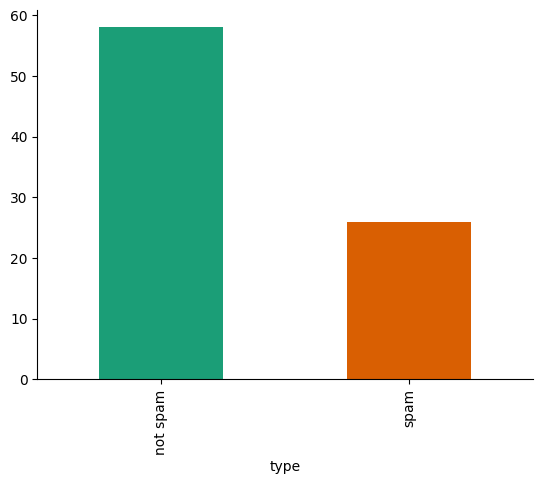

In [9]:
# Group by 'type' column and count occurrences, then plot as vertical bar chart
df.groupby('type').size().plot(kind='bar', color=sns.color_palette('Dark2'))

# Remove top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Display the plot
plt.show()


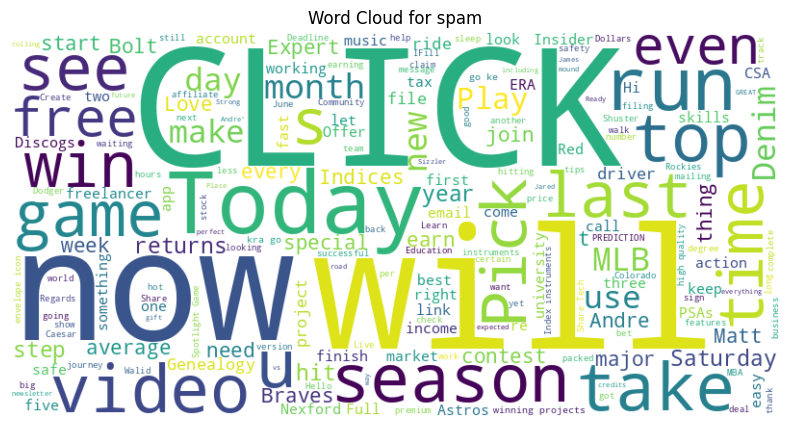

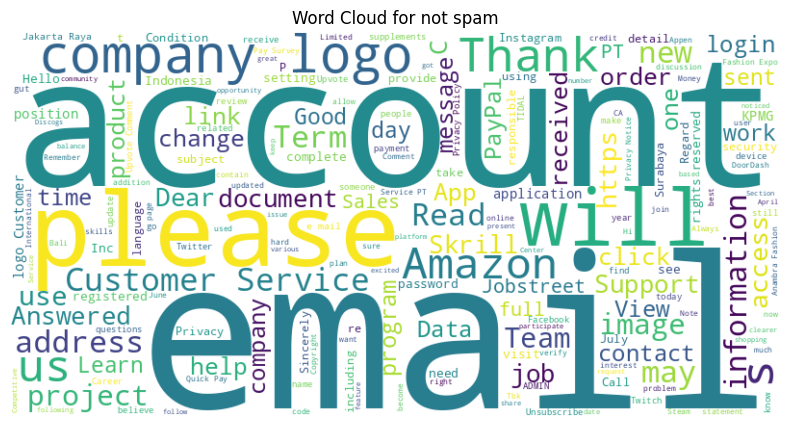

In [12]:
# Display the plot
plt.show()

# Generate word clouds for each type
types = df['type'].unique()
for t in types:
    text = " ".join(review for review in df[df['type'] == t]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {t}')
    plt.axis('off')
    plt.show()


In [13]:
df['text'].value_counts().sort_index()

text
\n?\nTOP STORIES FOR VIRA\n\nQuora\n?\nWhat is it like to have a six pack?\nRuban Mathivanan, studied at SRM Easwari Engineering College • Answered April 24, 2018\n\nSICK!!!!!!!!! No one here seems to be telling the ugly truth of the other side. Oh sure, six pack abs has got its own perks but let me tell you the downside of it. Firstly da... Read more »\nUpvote \n1.3K\n\nComment \n461\n\n?\nIs learning C++ easy if I know C?\nKurt Guntheroth, Software Engineer and Writer • Answered May 1\n\nC++ is what’s called a multi-paradigm language. Those paradigms are (currently) imperative, generic, functional, and object-oriented. If you know C, you can tick “imperativ... Read more »\nUpvote \n92\n\nComment \n14                                                                                                                                                                                                                                                                                            

In [15]:
train_data, test_data = train_test_split(df[['text', 'type']], test_size=0.2)  # randomly splitting 10% of dataset to be training dataset


In [16]:
train_data.shape,test_data.shape

((67, 2), (17, 2))

In [17]:
train_data['id']=1
test_data['id']=3

In [18]:
train_data.shape,test_data.shape

((67, 3), (17, 3))

In [20]:
text_data1=train_data[['text', 'type','id']]
text_data3=test_data[['text', 'type','id']]

lst=[text_data1,text_data3]
text_data=pd.concat(lst)

In [21]:
text_data.shape

(84, 3)

In [22]:
text=text_data['text']

In [23]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2024-06-21 12:34:49--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-06-21 12:34:50--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-06-21 12:34:50--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [24]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [25]:
word_collection=[]
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    word_collection.append(word)
f.close()

In [26]:
word_collection[0:10]

['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s"]

In [27]:
word_dict={}
keys=range(400000)
for i in keys:
    word_dict[word_collection[i]]=i+1

In [28]:
word_dict

{'the': 1,
 ',': 2,
 '.': 3,
 'of': 4,
 'to': 5,
 'and': 6,
 'in': 7,
 'a': 8,
 '"': 9,
 "'s": 10,
 'for': 11,
 '-': 12,
 'that': 13,
 'on': 14,
 'is': 15,
 'was': 16,
 'said': 17,
 'with': 18,
 'he': 19,
 'as': 20,
 'it': 21,
 'by': 22,
 'at': 23,
 '(': 24,
 ')': 25,
 'from': 26,
 'his': 27,
 "''": 28,
 '``': 29,
 'an': 30,
 'be': 31,
 'has': 32,
 'are': 33,
 'have': 34,
 'but': 35,
 'were': 36,
 'not': 37,
 'this': 38,
 'who': 39,
 'they': 40,
 'had': 41,
 'i': 42,
 'which': 43,
 'will': 44,
 'their': 45,
 ':': 46,
 'or': 47,
 'its': 48,
 'one': 49,
 'after': 50,
 'new': 51,
 'been': 52,
 'also': 53,
 'we': 54,
 'would': 55,
 'two': 56,
 'more': 57,
 "'": 58,
 'first': 59,
 'about': 60,
 'up': 61,
 'when': 62,
 'year': 63,
 'there': 64,
 'all': 65,
 '--': 66,
 'out': 67,
 'she': 68,
 'other': 69,
 'people': 70,
 "n't": 71,
 'her': 72,
 'percent': 73,
 'than': 74,
 'over': 75,
 'into': 76,
 'last': 77,
 'some': 78,
 'government': 79,
 'time': 80,
 '$': 81,
 'you': 82,
 'years': 83,
 '

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [30]:
t=Tokenizer()
t.word_index=word_dict
sequences=t.texts_to_sequences(text)

In [31]:
sequences[0:5]

[[2700, 38, 15, 5, 16564, 82, 13, 163, 9818, 32, 1150, 1, 284],
 [54,
  6040,
  8,
  51,
  64418,
  13076,
  46656,
  10109,
  54,
  6040,
  30,
  3218,
  64418,
  26,
  8,
  3273,
  47,
  2045,
  82,
  1141,
  235,
  16,
  38,
  82],
 [13076,
  21716,
  163,
  23247,
  581,
  287,
  15,
  4003,
  185,
  376,
  2974,
  23,
  80674,
  8693,
  51,
  197,
  80,
  3477,
  11,
  393,
  416,
  864,
  188,
  176,
  309,
  111,
  82,
  4295,
  2369,
  198,
  556,
  5,
  3850,
  30,
  1018,
  6401,
  796,
  607,
  8,
  123,
  2773,
  152,
  111,
  82,
  4295,
  1,
  1552,
  44,
  5277,
  38,
  334,
  226,
  592,
  1780,
  438,
  25074,
  1018,
  43,
  15,
  9744,
  4019,
  70,
  121,
  118,
  82,
  6,
  286,
  5,
  160,
  17101,
  533,
  230,
  26,
  501,
  121,
  315,
  410,
  607,
  533,
  148,
  1,
  1552,
  44,
  3393,
  1066,
  22,
  1066,
  198,
  82,
  87,
  2408,
  16724,
  38,
  2148,
  554,
  1787,
  6737,
  438,
  25074,
  11,
  4962,
  85,
  1222,
  47,
  558,
  3143,
  912,
  2583,

In [32]:
seq_len=[len(i) for i in sequences]
maxlen=max(seq_len)
maxlen

1077

In [33]:
a=np.array(seq_len)
p=np.percentile(a,97)
p

503.4099999999992

In [34]:
from tensorflow.keras  import preprocessing
padded_X=preprocessing.sequence.pad_sequences(sequences,padding='post',maxlen=33)

In [35]:
padded_X

array([[ 2700,    38,    15, ...,     0,     0,     0],
       [   54,  6040,     8, ...,     0,     0,     0],
       [ 2027,  8968,    92, ...,   188,  9482,  3792],
       ...,
       [    1,  2045,     4, ...,     5,    38,  1444],
       [   38,    15,    30, ...,     0,     0,     0],
       [  393, 23826,  3109, ...,  9921, 74494,   146]], dtype=int32)

In [36]:
colnames=[]
for i in range(padded_X.shape[1]):
    name= 'X_'+str(i+1)
    colnames.append(name)
df_padded=pd.DataFrame(padded_X,columns=colnames)
data_padded=pd.concat([text_data.reset_index(drop=True),df_padded],axis=1)

In [37]:
data_padded.head()

,text,type,id,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33
0,"Sir, this is to notify you that our shipment h...",not spam,1,2700,38,15,5,16564,82,13,...,0,0,0,0,0,0,0,0,0,0
1,We noticed a new login\nHello ondiekijohn254@g...,not spam,1,54,6040,8,51,64418,13076,46656,...,82,0,0,0,0,0,0,0,0,0
2,"Hello Walid,\n\nOur Zoom call meeting is tomor...",spam,1,2027,8968,92,8,1193,224,4,...,2859,1269,3477,11,393,416,864,188,9482,3792
3,Model Casting Call\nThank you for taking the t...,not spam,1,393,23826,3109,1836,20215,11,1,...,2859,123043,1645,255,9482,71343,2536,9921,74494,146
4,"Jobstreet.com\n\nHi ANGGRAENI, we've got new j...",not spam,1,57,1053,16842,38,3640,197796,276,...,4833,4,40475,10109,4787,886,74494,65,418,6622


In [38]:
train=data_padded[data_padded['id']==1]
test=data_padded[data_padded['id']==3]

In [39]:
train.shape, test.shape

((67, 36), (17, 36))

In [46]:
train.text.value_counts(normalize = True), test.type.value_counts(normalize = True)

(text
 We noticed a new login\nHello ondiekijohn254@gmail.com, we noticed an unusual login from a device or location you don't usually use.\nWas this you?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [47]:
train['words']=[len(x.split()) for x in train['text'].tolist()]
train['text_length']=[len(x) for x in train['text'].tolist()]
train[['words','text_length' ,'text']].head()

<ipython-input-47-26eb57908284>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['words']=[len(x.split()) for x in train['text'].tolist()]
<ipython-input-47-26eb57908284>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['text_length']=[len(x) for x in train['text'].tolist()]


,words,text_length,text
0,13,68,"Sir, this is to notify you that our shipment h..."
1,24,145,We noticed a new login\nHello ondiekijohn254@g...
2,163,940,"Hello Walid,\n\nOur Zoom call meeting is tomor..."
3,156,1057,Model Casting Call\nThank you for taking the t...
4,332,2399,"Jobstreet.com\n\nHi ANGGRAENI, we've got new j..."


In [48]:
test['words']=[len(x.split()) for x in test['text'].tolist()]
test['text_length']=[len(x) for x in test['text'].tolist()]
test[['words','text_length' ,'text']].head()

<ipython-input-48-30f1ee425915>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['words']=[len(x.split()) for x in test['text'].tolist()]
<ipython-input-48-30f1ee425915>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['text_length']=[len(x) for x in test['text'].tolist()]


,words,text_length,text
67,3,27,RTD to iiiiiiuiiiiiiiiiiiii
68,1088,6079,"Hey Prachanda Rawal,\n\nToday's newsletter is ..."
69,383,2538,"Dear John,\n\n \n\nThank you for expressing in..."
70,148,904,View in browser\n\nAre you a luxury traveller ...
71,70,466,"Dear Customer,\n\nWelcome to Kilimall, Thanks ..."


In [49]:
train.columns

Index(['text', 'type', 'id', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16',
       'X_17', 'X_18', 'X_19', 'X_20', 'X_21', 'X_22', 'X_23', 'X_24', 'X_25',
       'X_26', 'X_27', 'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'words',
       'text_length'],
      dtype='object')

In [53]:
# Single line for train DataFrame
train_counts = train['text'].value_counts().sort_index() if 'text' in train.columns else "Column 'New_label' not found in train"
print(train_counts)

text
\n?\nTOP STORIES FOR VIRA\n\nQuora\n?\nWhat is it like to have a six pack?\nRuban Mathivanan, studied at SRM Easwari Engineering College • Answered April 24, 2018\n\nSICK!!!!!!!!! No one here seems to be telling the ugly truth of the other side. Oh sure, six pack abs has got its own perks but let me tell you the downside of it. Firstly da... Read more »\nUpvote \n1.3K\n\nComment \n461\n\n?\nIs learning C++ easy if I know C?\nKurt Guntheroth, Software Engineer and Writer • Answered May 1\n\nC++ is what’s called a multi-paradigm language. Those paradigms are (currently) imperative, generic, functional, and object-oriented. If you know C, you can tick “imperativ... Read more »\nUpvote \n92\n\nComment \n14                                                                                                                                                                                                                                                                                            

In [56]:
train['text'] = train['text'].apply(lambda x: x[:-1])

print(train)


                                                 text      type  id    X_1  \
0   Sir, this is to notify you that our shipment h...  not spam   1   2700   
1   We noticed a new login\nHello ondiekijohn254@g...  not spam   1     54   
2   Hello Walid,\n\nOur Zoom call meeting is tomor...      spam   1   2027   
3   Model Casting Call\nThank you for taking the t...  not spam   1    393   
4   Jobstreet.com\n\nHi ANGGRAENI, we've got new j...  not spam   1     57   
..                                                ...       ...  ..    ...   
62  Netflix\nLearn more about your new account\nHe...  not spam   1    276   
63  Hi John\nNEW JOB OPENINGS\nHere are the latest...  not spam   1  11084   
64  Dear Sir/ Madam\n\nI would like to enquire abo...  not spam   1     34   
65  Today more than ever you need to upskill and r...      spam   1   6480   
66  RE: Junior Admin Assistant\n\nDear Hiring Prof...  not spam   1     47   

      X_2    X_3   X_4    X_5     X_6    X_7  ...   X_26   X_27

<ipython-input-56-cdda2bc58f1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['text'] = train['text'].apply(lambda x: x[:-1])


In [57]:
train['text'].value_counts()

text
We noticed a new login\nHello ondiekijohn254@gmail.com, we noticed an unusual login from a device or location you don't usually use.\nWas this you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [68]:
import pandas as pd
from tensorflow.keras.utils import to_categorical
import numpy as np

# Assuming train['new_labels'] contains your labels as strings
y = train['text']

# Create a label encoder to map strings to integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Calculate the number of unique classes
num_classes = len(np.unique(y_encoded))  # Dynamically determine num_classes

# Convert labels to categorical one-hot encoding
labels = to_categorical(np.asarray(y_encoded), num_classes=num_classes)  # Use calculated num_classes

In [69]:
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [70]:
embeddings_index = {}
f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [71]:
embeddings_index

{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
        -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
         0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
        -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
         0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
        -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
         0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
         0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
        -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
        -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
        -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
        -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
        -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
        -1.2526  ,  0.071624,  

In [72]:
unique_word_length=len(embeddings_index)+1
embeddings_matrix=np.zeros((unique_word_length,100))
for word,i in t.word_index.items():
    embedding_vector=embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i]=embedding_vector

In [73]:
embeddings_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.10767   ,  0.11053   ,  0.59811997, ..., -0.83155   ,
         0.45293   ,  0.082577  ],
       ...,
       [ 0.36087999, -0.16919   , -0.32703999, ...,  0.27138999,
        -0.29188001,  0.16109   ],
       [-0.10461   , -0.50470001, -0.49331   , ...,  0.42526999,
        -0.51249999, -0.17054   ],
       [ 0.28365001, -0.62629998, -0.44351   , ...,  0.43678001,
        -0.82607001, -0.15701   ]])

In [74]:
from tensorflow.keras.layers import Embedding

In [75]:
embedding_layer=Embedding(input_dim=unique_word_length,output_dim=100,weights=[embeddings_matrix],input_length=33, trainable=False)

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import BatchNormalization

In [77]:
train.head()

,text,type,id,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,words,text_length
0,"Sir, this is to notify you that our shipment h...",not spam,1,2700,38,15,5,16564,82,13,...,0,0,0,0,0,0,0,0,13,68
1,We noticed a new login\nHello ondiekijohn254@g...,not spam,1,54,6040,8,51,64418,13076,46656,...,0,0,0,0,0,0,0,0,24,145
2,"Hello Walid,\n\nOur Zoom call meeting is tomor...",spam,1,2027,8968,92,8,1193,224,4,...,3477,11,393,416,864,188,9482,3792,163,940
3,Model Casting Call\nThank you for taking the t...,not spam,1,393,23826,3109,1836,20215,11,1,...,1645,255,9482,71343,2536,9921,74494,146,156,1057
4,"Jobstreet.com\n\nHi ANGGRAENI, we've got new j...",not spam,1,57,1053,16842,38,3640,197796,276,...,40475,10109,4787,886,74494,65,418,6622,332,2399


In [78]:
import tensorflow
tensorflow.random.set_seed(100)
lstm=Sequential()
lstm.add(embedding_layer)
lstm.add(LSTM(256,dropout=0.2,recurrent_dropout=0.5))
lstm.add(Dense(6,activation='softmax'))
lstm.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 33, 100)           40000100  
                                                                 
 lstm (LSTM)                 (None, 256)               365568    
                                                                 
 dense (Dense)               (None, 6)                 1542      
                                                                 
Total params: 40367210 (153.99 MB)
Trainable params: 367110 (1.40 MB)
Non-trainable params: 40000100 (152.59 MB)
_________________________________________________________________


In [79]:
train[colnames].head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33
0,2700,38,15,5,16564,82,13,163,9818,32,...,0,0,0,0,0,0,0,0,0,0
1,54,6040,8,51,64418,13076,46656,10109,54,6040,...,82,0,0,0,0,0,0,0,0,0
2,2027,8968,92,8,1193,224,4,3374,87,2056,...,2859,1269,3477,11,393,416,864,188,9482,3792
3,393,23826,3109,1836,20215,11,1,1424,7029,4,...,2859,123043,1645,255,9482,71343,2536,9921,74494,146
4,57,1053,16842,38,3640,197796,276,6482,18,5311,...,4833,4,40475,10109,4787,886,74494,65,418,6622


In [86]:
# Import necessary libraries
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
import tensorflow as tf

# Example setup for reproducibility
tf.random.set_seed(100)

# Sample data setup (replace this with your actual data loading process)
# Make sure 'new_labels' and 'colnames' are correct
train = pd.DataFrame({
    'new_labels': np.random.randint(0, 6, size=1000),
    'feature1': np.random.rand(1000),
    'feature2': np.random.rand(1000)
})
colnames = ['feature1', 'feature2']

# Ensure 'new_labels' column is present
if 'new_labels' not in train.columns:
    raise KeyError("'new_labels' column is not found in the DataFrame")

# Extract labels and convert to integers
y = np.asarray(train['new_labels']).astype(int)

# Ensure num_classes is correctly set
num_classes = 6

# Convert labels to categorical one-hot encoding
labels = to_categorical(y, num_classes=num_classes)
print("Labels shape:", labels.shape)  # Should be (number of samples, 6)

# Check and preprocess the input data
input_data = train[colnames].values
print("Input data shape:", input_data.shape)

# Assuming 'embedding_layer' is defined correctly
embedding_layer = Embedding(input_dim=1000, output_dim=64)  # Adjust according to your actual setup

# Define and compile the LSTM model
lstm = Sequential()
lstm.add(embedding_layer)
lstm.add(LSTM(256, dropout=0.2, recurrent_dropout=0.5))
lstm.add(Dense(num_classes, activation='softmax'))  # Output layer with num_classes units and softmax activation
lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
lstm.summary()

# Fit the model
hist = lstm.fit(input_data, labels, validation_split=0.2, epochs=10, batch_size=256)


Labels shape: (1000, 6)
Input data shape: (1000, 2)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          64000     
                                                                 
 lstm_4 (LSTM)               (None, 256)               328704    
                                                                 
 dense_2 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 394246 (1.50 MB)
Trainable params: 394246 (1.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
4/4 [==============================] - 15s 802ms/step - loss: 1.7920 - acc: 0.1575 - val_loss: 1.7931 - val_acc: 0.1300
Epoch 2/10
4/4 [==============================] - 0s 100ms/step - loss: 1.7899 - acc: 0.1937 - val_

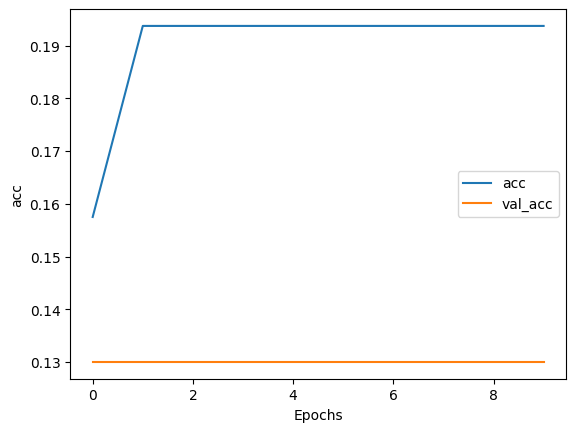

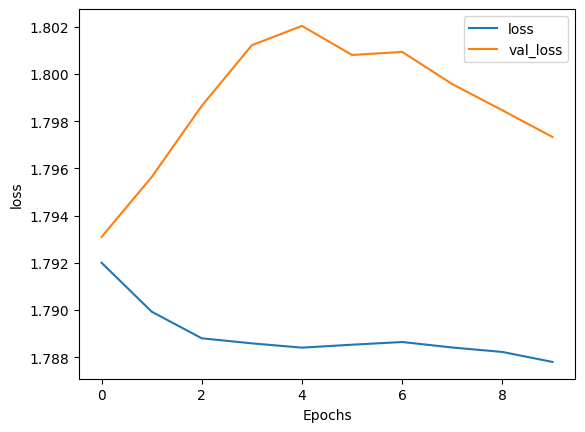

In [87]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(hist, 'acc')
plot_graphs(hist, 'loss')
plt.show()

In [88]:
test.head(2)

,text,type,id,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,words,text_length
67,RTD to iiiiiiuiiiiiiiiiiiii,spam,3,71255,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,27
68,"Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam,3,1084,425,616,23,247,38,196,...,5,661,45,1628,3142,191,1,75,1088,6079


In [96]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Example DataFrame (assuming you have actual data in these columns)
data = {
    'text': ["sample text"]*4,
    'type': [1, 1, 1, 1],
    'id': [1, 2, 3, 4],
    'X_1': [0.1, 0.2, 0.3, 0.4],
    'X_2': [1.1, 1.2, 1.3, 1.4],
    'X_33': [3.1, 3.2, 3.3, 3.4],
    'words': [10, 20, 30, 40],
    'text_length': [100, 200, 300, 400]
}
test = pd.DataFrame(data)

# Print the columns of the test DataFrame to identify the available features
print("Columns in test DataFrame:", test.columns)

# Define colnames based on the actual columns in test DataFrame
colnames = ['X_1', 'X_2', 'X_33']  # Adjust this list based on the actual columns present

# Define and load your LSTM model (simplified example)
model = Sequential()
model.add(LSTM(10, input_shape=(1, len(colnames))))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Simulating loading a trained model (for example purposes)
# In practice, you would load your trained model like this:
# model = load_model('your_model_path.h5')

# Reshape the test data to match the LSTM input shape (samples, timesteps, features)
test_data = test[colnames].values.astype(np.float32)
test_data = np.reshape(test_data, (test_data.shape[0], 1, test_data.shape[1]))

# Make predictions
pred = np.argmax(model.predict(test_data), axis=1)

# Print the predictions
print("Predictions:", pred)


Columns in test DataFrame: Index(['text', 'type', 'id', 'X_1', 'X_2', 'X_33', 'words', 'text_length'], dtype='object')
1/1 [==============================] - 1s 764ms/step
Predictions: [0 0 0 0]


In [97]:
pred.shape

(4,)

In [98]:
pd.DataFrame(pred).value_counts()

0    4
Name: count, dtype: int64

In [112]:
# Apply the lambda function to remove the last character of each entry in the column
train[correct_column_name] = train[correct_column_name].apply(lambda x: x[:-1])

# Print the modified DataFrame
print(train)


   new_labels       feature1  feature2
0           0  This is a sen       1.1
1           1    Another sen       2.2
2           0      More text       3.3
3           1          Text        4.4


In [119]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Example of categorical labels (replace with your actual labels)
y_test = ['label1', 'label2', 'label3', 'label1', 'label2']

# Use LabelEncoder to encode labels to numeric categories
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Convert encoded labels to categorical
labels_test = to_categorical(y_test_encoded, num_classes=6)

In [117]:
labels_test[0]

array([1., 0., 0., 0., 0., 0.], dtype=float32)

In [130]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[0, 0],
       [1, 0]])

In [133]:
# Assuming 'test' and 'y_test' should have the same number of samples,
# adjust either 'test' or 'y_test' to have matching lengths.

# Example: If 'y_test' needs to be extended, recreate it with appropriate labels
y_test = ['label1', 'label2', 'label3', 'label1']  # Example labels, replace with your actual labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
labels_test = to_categorical(y_test_encoded, num_classes=6)

# Now evaluate the model
accr = lstm.evaluate(test[colnames],labels_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1/1 [==============================] - 0s 389ms/step - loss: 1.7634 - acc: 0.2500
Test set
  Loss: 1.763
  Accuracy: 0.250


In [136]:
otv_data=pd.read_parquet("/content/konbert-export-0916d66b2ffa4.parquet")

In [137]:
otv_data.head()

,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
1,?? You Earned 500 GCLoot Points,"alt_text\nCongratulations, you just earned\n50...",not spam
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam


In [145]:
import pandas as pd

def new_col(data):
    if data.get('label') in (10,11,12,13,23,29,34,37,38,39,40,43,54,72,73):
        data['New_label']=1
        data['description']= 'tittle'
    elif data.get('label') in (0,1,2,3,7,14,18,24,36,68,69,74):
        data['New_label']=2
        data['description']= 'text'
    elif data.get('label') in (22,41,42):
        data['New_label']=3
        data['description']= 'type'
    elif data.get('label') in (4,47,56,57,58,59,60,61,62,71):
        data['New_label']=4
        data['description']= 'spam'
    elif data.get('label') in (5,6,8,15,16,17,19,20,25,26,27,28,31,32,33,35,45,46,48,50,51,52,53,63,64,65,66,67,70,75,76):
        data['New_label']=5
        data['description']= 'non spam'
    elif data.get('label') in (9,21,30,44,49,55):
        data['New_label']=6
        data['description']= 'Update'
    else:
        data['New_label']=7
        data['description']= 'Others'

    return data

# Example DataFrame creation (replace with your actual data loading)
data = {
    'label': [10, 3, 22, 47, 5],
    # Add other columns as needed
}
otv_data = pd.DataFrame(data)

# Applying the function to each row
otv_new = otv_data.apply(new_col, axis=1)

# Display the modified DataFrame
print(otv_new)


   label  New_label description
0     10          1      tittle
1      3          2        text
2     22          3        type
3     47          4        spam
4      5          5    non spam


In [146]:
otv_df = otv_new[['description', 'New_label']]

In [147]:
otv_df.head()

,description,New_label
0,tittle,1
1,text,2
2,type,3
3,spam,4
4,non spam,5


In [149]:
otv_text=otv_df['description']

In [150]:
t=Tokenizer()
t.word_index=word_dict
sequences_otv=t.texts_to_sequences(otv_text)


In [151]:
padded_otv=preprocessing.sequence.pad_sequences(sequences_otv,padding='post',maxlen=33)

In [152]:
colnames=[]
for i in range(padded_otv.shape[1]):
    name= 'X_'+str(i+1)
    colnames.append(name)
df_padded_otv=pd.DataFrame(padded_otv,columns=colnames)
data_padded_otv=pd.concat([otv_df.reset_index(drop=True),df_padded_otv],axis=1)

In [153]:
data_padded_otv[colnames]

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33
0,86244,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2830,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1555,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16392,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1338,16392,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
otv_df['new_labels']=otv_df['New_label'].apply(lambda x:x-1)

In [155]:
otv_df['new_labels'].value_counts()

new_labels
0    1
1    1
2    1
3    1
4    1
Name: count, dtype: int64

In [156]:
from tensorflow.keras.utils import to_categorical
y_otv=otv_df['new_labels']

labels_otv=tf.keras.utils.to_categorical(np.asarray(y_otv),num_classes=6)

In [171]:
# Assuming 'lstm' is your defined LSTM model and 'data_padded_otv' is your DataFrame

# 1. Find the vocabulary size used in your embedding layer
vocab_size = lstm.layers[0].input_dim  # Assuming the first layer is the Embedding layer

# 2. Check the range of values in your input data
max_token_index = data_padded_otv[colnames].max().max()

# 3. Compare the vocabulary size with the maximum token index
print("Vocabulary size of embedding layer:", vocab_size)
print("Maximum token index in input data:", max_token_index)

# 4. If max_token_index >= vocab_size, you need to either:
#    - Increase the vocabulary size of your embedding layer when you define your model.
#    - Preprocess your input data to map token indices to the range [0, vocab_size-1].

Vocabulary size of embedding layer: 1000
Maximum token index in input data: 2830
